In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/My Drive/MNIST/Sign_MNIST/

/gdrive/My Drive/MNIST/Sign_MNIST


In [ ]:
ls

american_sign_language.PNG  sign_mnist_test/     sign_mnist_train.csv
amer_sign2.png              sign_mnist_test.csv
amer_sign3.png              sign_mnist_train/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels = train['label']

In [ ]:
train.drop('label', axis = 1, inplace = True)
print(train.shape)

(27455, 784)


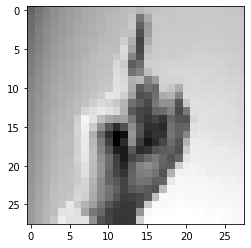

In [ ]:
x_train = train.values.reshape(train.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

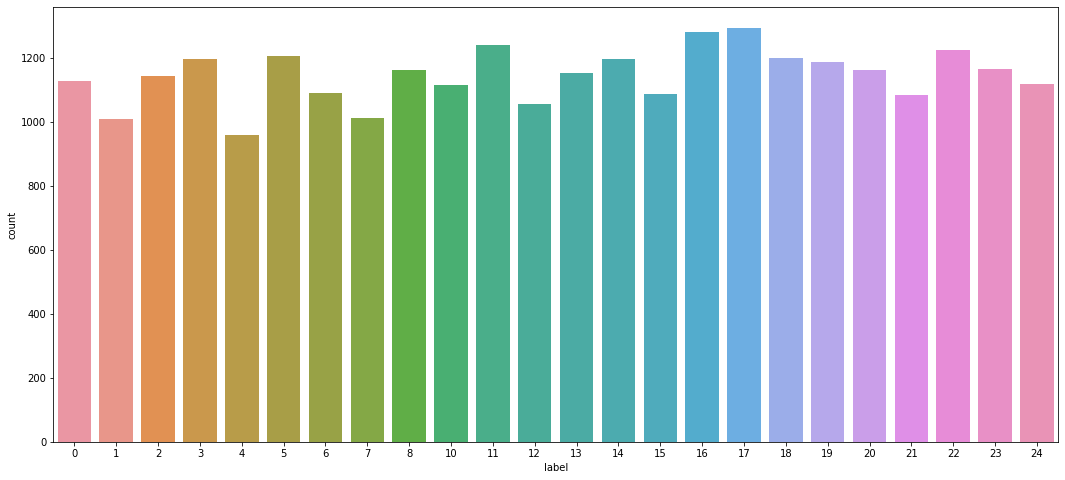

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [ ]:
labels = to_categorical(labels)
print(labels.shape)

(27455, 25)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, labels, test_size = 0.2, random_state = 2)
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)


In [ ]:
num_classes = 25
input_shape = (28,28,1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation = 'relu', input_shape=input_shape ))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (3, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (3, 3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
batch_size = 128
num_epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data = (x_test, y_test))

Epoch 1/5
172/172 [==============================] - 46s 266ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0028 - val_accuracy: 0.9998
Epoch 2/5
172/172 [==============================] - 46s 265ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/5
172/172 [==============================] - 46s 265ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 4/5
172/172 [==============================] - 46s 265ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 7.2807e-04 - val_accuracy: 1.0000
Epoch 5/5
172/172 [==============================] - 46s 265ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 6.5551e-04 - val_accuracy: 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


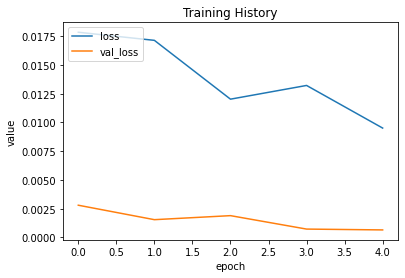

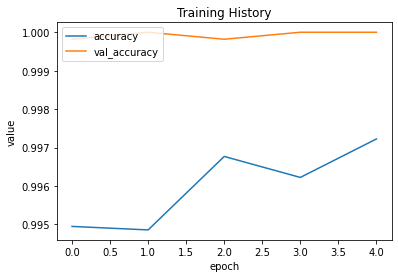

In [ ]:
keys=history.history.keys()
print(keys)
def show_train_history(hisData,t1,t2): 
    plt.plot(hisData.history[t1])
    plt.plot(hisData.history[t2])
    plt.title('Training History')
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend([t1, t2], loc='upper left')
    plt.show()
show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.0006555103464052081
Test accuracy:  1.0
